## Exploratory Data Analysis

#### As a business manager, try to find out the weak areas where you can work to make more profit.
#### What all business problems you can derive by exploring the data?
This makes 'Profit' as the target variable and the rest as the features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Step 1: Reading the data

In [2]:
raw_data = pd.read_csv('SampleSuperstore.csv')
raw_data.head() # a peek into the dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
(r,c) = raw_data.shape
print('No. of observations: ',r,'\n')
print('No. of features: ',c)

No. of observations:  9994 

No. of features:  13


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
raw_data.describe(include='all') #get statistical description of columns

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


##### 
1)There are no missing values in the entire dataset as the count in all features is maximum i.e 9994.

2)There is only one unique value in Country feature hence its the same as to say that all observations are independent of the country 

3)Postal Code doesn't serve much purpose as City feature is already present.(Assumption #1)

Hence, we can remove the Country and Postal Code features to simplify our analysis

#### Step 2: Cleaning the data

In [6]:
data = raw_data.copy() #removing irrelevant columns
data.drop(['Country','Postal Code'], axis=1,inplace=True)

In [7]:
data.isnull().sum() #counting missing values in each feature

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

This also proves that the data is free from any missing values

In [8]:
data.duplicated().sum() #finding duplicate observations

50

In [9]:
data.drop_duplicates().shape #no. of rows and columns after removing duplicates

(9944, 11)

#### Step 3: Analyzing the data

In [10]:
data.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
print('Numerical features are: ' ) 
print(data.select_dtypes(include='number').columns.tolist(),'\n')
print('Categorical features are: ')
print(data.select_dtypes(include='object').columns.tolist())

Numerical features are: 
['Sales', 'Quantity', 'Discount', 'Profit'] 

Categorical features are: 
['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']


#### Finding outliers
From the statistical description we can see the presence of outliers in Sales, Quantity, Discount and Profit

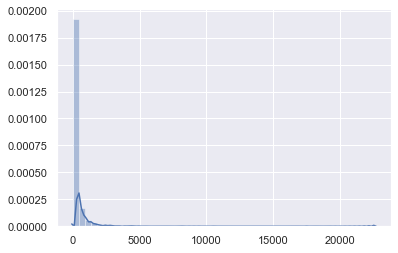

In [12]:
sns.distplot(data[['Sales']])
plt.show()

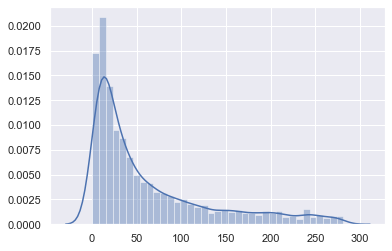

In [13]:
q = data['Sales'].quantile(0.80)
data1 = data[data['Sales']<q]

sns.distplot(data1[['Sales']])
plt.show()

We can still see the distribution of sales is skewed towards the right. It would be safe to consider values more than 150 as outliers.

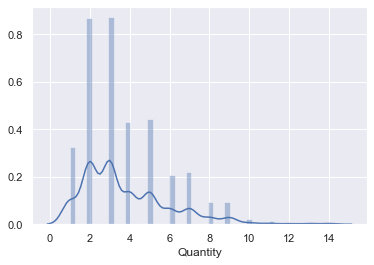

In [14]:
sns.distplot(data['Quantity'])
plt.show()

In [15]:
data['Discount'].value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

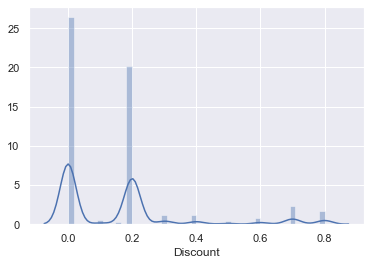

In [16]:
sns.distplot(data['Discount'])
plt.show()

In case of Discount we can see that maximum occurences are for only 2 value i.e 0.0 and 0.2. All the remaining values are kind of outliers.

#### Understanding the correlation between numerical features

In [17]:
num_data = data[['Sales', 'Quantity', 'Discount', 'Profit']] #finding correlation among numerical features
corr = num_data.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


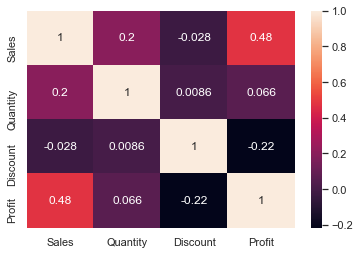

In [18]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

From the correlation matrix we can say that the 'Profit' has positive correlation with 'Sales' and a negative correlation with 'Discount'

This is highly intuitive that as sales increase and discounts decrease, profits tend to increase.

Though there is not a very signifiacnt correlation between Profit and Quantity.

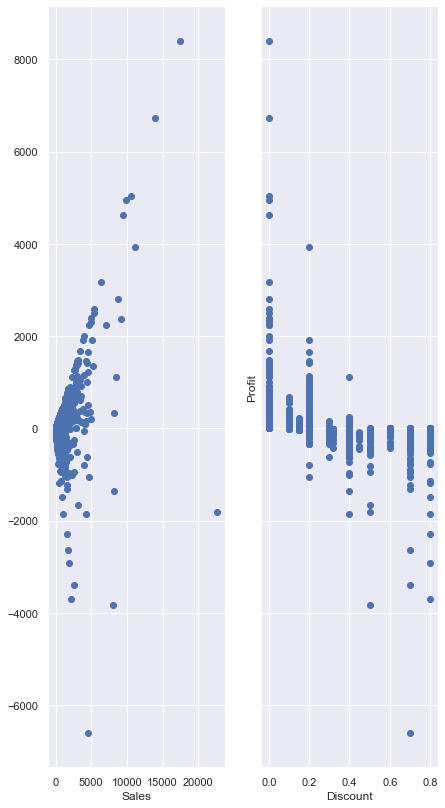

In [24]:
fig,(ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(7,1))
ax1.scatter(data['Sales'],data['Profit'])
ax1.set_xlabel('Sales')
ax2.scatter(data['Discount'],data['Profit'])
ax2.set_xlabel('Discount')
plt.ylabel('Profit')
plt.show()

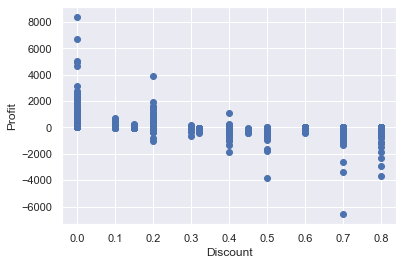

In [21]:
plt.scatter(data['Discount'],data['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

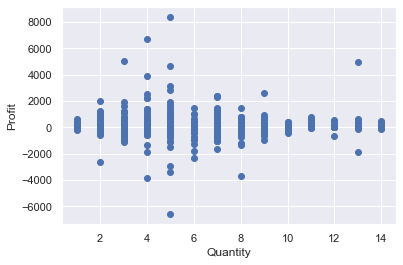

In [22]:
plt.scatter(data['Quantity'],data['Profit'])
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.show()

#### Analyzing the relation of categorical features in target 'Profit'

In [42]:
data_by_category = data[['Sales','Discount','Profit','Category']].groupby(['Category']).sum()

data_by_category = data_by_category.reset_index()
data_by_category

,Category,Sales,Discount,Profit
0,Furniture,741999.7953,368.89,18451.2728
1,Office Supplies,719047.0320,947.80,122490.8008
2,Technology,836154.0330,244.40,145454.9481


Technology has very high sales and some discount too and have highest profit.
Office supplies has lesser sales than Furniture but have much higher discount and has higher Profit too.

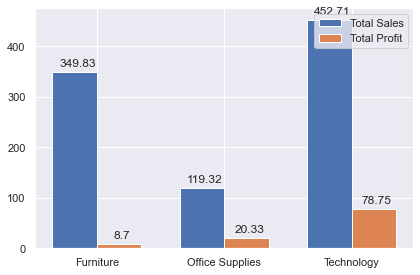

In [34]:
categories = data['Category'].unique().tolist()
sales_mean = data[['Category','Sales']].groupby(['Category']).mean().values.flatten()
profits_mean = data[['Category','Profit']].groupby(['Category']).mean().values.flatten()

width=0.35
labels = ['Furniture', 'Office Supplies', 'Technology']
x = np.arange(len(categories))
fig,ax = plt.subplots()
r1 = ax.bar(x-(width/2),sales_mean,width)
r2 = ax.bar(x+(width/2),profits_mean,width)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(["Total Sales", "Total Profit"],loc='upper right')

for rect in r1:
    height = rect.get_height().round(2)
    ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha='center', va='bottom')
for rect in r2:
    height = rect.get_height().round(2)
    ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha='center', va='bottom')

fig.tight_layout()
plt.show()

TypeError: plot got an unexpected keyword argument 'x'

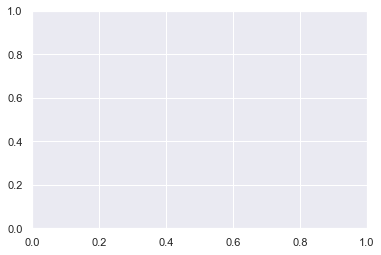

In [45]:
sns.kdeplot(data=profits_mean, x="Profit")

In [11]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

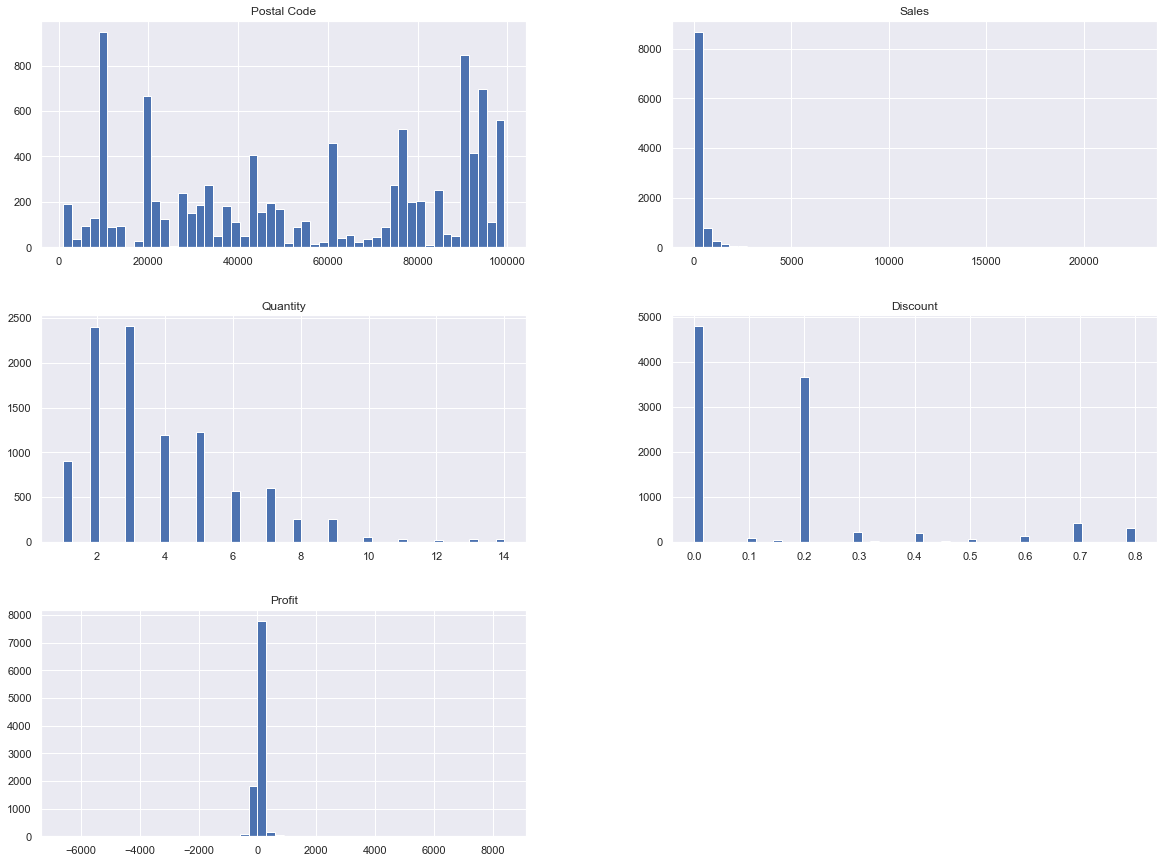

In [12]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
fur_data = data[data['Category']=='Office Supplies']
fur_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.560,7,0.0,16.7132
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [14]:
(fur_data[['Sales']].sum())/fur_data[['Sales']].count()

Sales    119.324101
dtype: float64

In [15]:
off_data = data[data['Category']=='Office Supplies']
(off_data[['Sales']].sum())/off_data[['Sales']].count()

Sales    119.324101
dtype: float64

In [16]:
fur_data[['Discount','Profit']]

,Discount,Profit
2,0.0,6.8714
4,0.2,2.5164
6,0.0,1.9656
8,0.2,5.7825
9,0.0,34.4700
...,...,...
9982,0.0,16.7132
9984,0.0,15.1200
9985,0.0,16.1240
9992,0.0,13.3200


In [18]:
fur_data[['Sub-Category']].value_counts()

Sub-Category
Binders         1523
Paper           1370
Storage          846
Art              796
Appliances       466
Labels           364
Envelopes        254
Fasteners        217
Supplies         190
dtype: int64

In [19]:
fur_data[fur_data['Discount']>0.4][['Sub-Category']].value_counts()

Sub-Category
Binders         613
Appliances       67
dtype: int64

In [20]:
fur_data[fur_data['Discount']<0.4][['Sub-Category']].value_counts()

Sub-Category
Paper           1370
Binders          910
Storage          846
Art              796
Appliances       399
Labels           364
Envelopes        254
Fasteners        217
Supplies         190
dtype: int64

Text(0.5, 1.0, 'Ship Mode v/s Profit')

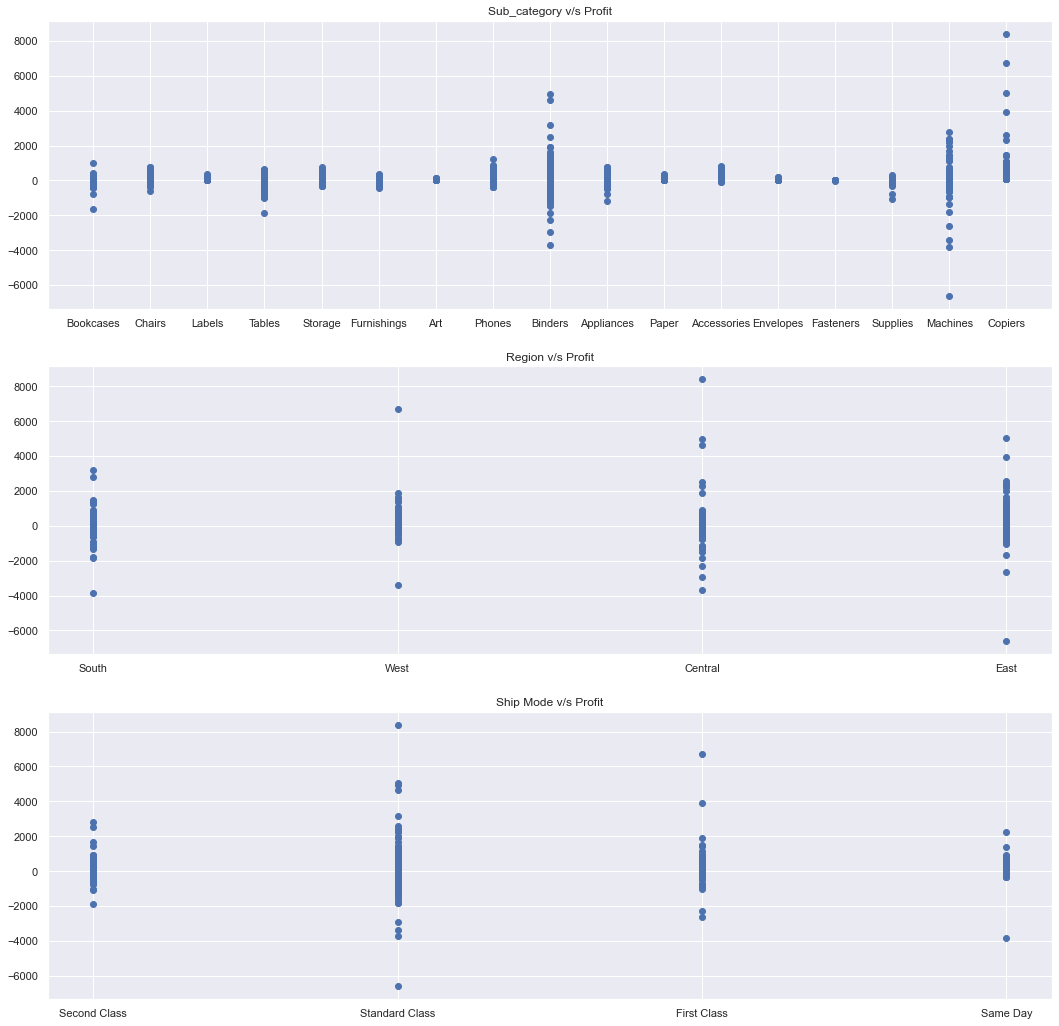

In [71]:
f,(ax1,ax2,ax3) = plt.subplots(3,1,sharey=True,figsize=(18,18))
ax1.scatter(data['Sub-Category'],data['Profit'])
ax1.set_title('Sub_category v/s Profit')
ax2.scatter(data['Region'],data['Profit'])
ax2.set_title('Region v/s Profit')
ax3.scatter(data['Ship Mode'],data['Profit'])
ax3.set_title('Ship Mode v/s Profit')